In [25]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits, load_iris
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from IPython.display import Image

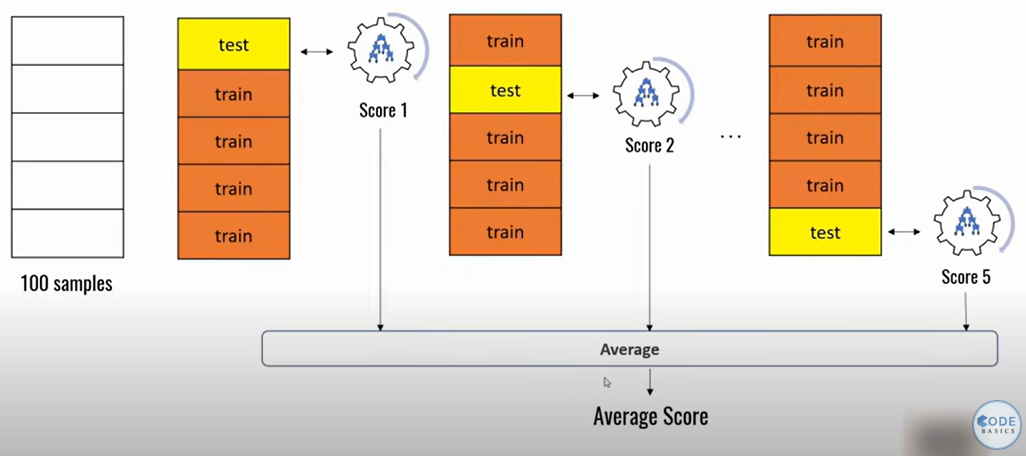

In [3]:
#instead of just one train and test set, we change what is our test set and take the average of each try
#allows use of comparing parameters with one line of code

Image('cross_val.png') 

In [4]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.3)

In [6]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9629629629629629

In [7]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9888888888888889

In [8]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.975925925925926

In [9]:
#splits the training and test sets into the n_splits
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [13]:
#notice how the fold is able to return the indexes of the values that seperate the train and test sets
for train_index, test_index in kf.split([2, 4, 6, 8, 10, 12, 14, 16, 18]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [17]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [12]:
#stratified is the same except it tries to pick more varianced 
folds = StratifiedKFold(n_splits=3)

In [20]:
scores_1 = []
scores_svm = []
scores_rf = []

for train_index, test_index in kf.split(digits.data):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]
    scores_1.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))
    

C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [24]:
#these are the fold answers mathematically, but there is an easier way

np.mean(scores_1), np.mean(scores_svm), np.mean(scores_rf)

(0.9265442404006677, 0.9677239844184752, 0.9371174179187535)

In [26]:
#made five different combinations the test set and saw % correct
cross_val_score(LogisticRegression(), digits.data, digits.target)

C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [27]:
cross_val_score(SVC(), digits.data, digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

NameError: name 'X' is not defined